In [96]:
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

import numpy as np
import importlib
import integralclient as ic
from astropy.time import Time
from astropy.coordinates import SkyCoord
import hashlib


hashstring = lambda x:hashlib.sha224(x.encode()).hexdigest()[:8]

T0_isot = "2023-11-15T15:36:21"
T0_ijd = Time(T0_isot, scale='utc').tt.mjd - 51544

src_coord = SkyCoord.from_name("M82")
source_name = "GRB231115A"
src_coord

# ! pip install ddaclient>=1.1.6
import ddaclient

ddac = ddaclient.RemoteDDA(service_url="private=https://dda-interface-private.obsuks1.unige.ch,public=http://dda-interface-private.obsuks1.unige.ch", 
                           ddcache_root_local="/data/reduced/ddcache")
                        #    ddcache_root_local="/mnt/sshfs/lesta/projects/astro/integral/data/reduced/ddcache-public-usr_astro_in-p1"
         

modules = ['git://ddosa/staging-1-3',
        #    'git://ddosa11/icversion-noisecontrol', 
        #    'git://gencat',
           'git://ddjemx',
           'git://ddosa_delegate']


cat = ("SourceCatalog", 
           {
            "autoversion": True, 
            "catalog": [
                {"NAME":source_name, "RA": src_coord.ra.deg , "DEC":  src_coord.dec.deg}
            ]
           }
      )

bursts = [
    # {
    #     "ijd": T0_ijd,
    #     "t1_rel_s": -0.3,
    #     "t2_rel_s": -0.2,
    # },
    # {
    #     "ijd": T0_ijd,
    #     "t1_rel_s": -0.2,
    #     "t2_rel_s": 0.8,
    # },
    # {
    #     "ijd": T0_ijd,
    #     "t1_rel_s": -0.2,
    #     "t2_rel_s": 9.8,
    # },
    # {
    #     "ijd": T0_ijd,
    #     "t1_rel_s": -0.2,
    #     "t2_rel_s": 99.8,
    # },
    # {
    #     "ijd": T0_ijd,
    #     "t1_rel_s": -0.2,
    #     "t2_rel_s": 999.8,
    # },    
    {
        "ijd": T0_ijd,
        "t1_rel_s": -2000.,
        "t2_rel_s": 2000.,
    },    
]

for burst in bursts:
    rs = {}
    burst['image_results'] = rs
    
    #if '14:34:' not in burst['utc_integral']:
    #    print("skipping", burst['utc_integral'])
    #    continue
    
    for dt_extra in 0,:
    # for dt_extra in 0,0.1,0.05:
        burst_0_ijd = burst['ijd']
        dt1 = burst['t1_rel_s'] - dt_extra
        dt2 = burst['t2_rel_s'] + dt_extra

        print(dt1,dt2)

        #if burst['snr']<40:   
        #    continue

        burst['image_results'] = rs

        t1_utc = ic.converttime("IJD", 
                               burst_0_ijd + dt1/24/3600, 
                               "UTC")

        t2_utc = ic.converttime("IJD", 
                            burst_0_ijd + dt2/24/3600, 
                            "UTC")

        scw=ic.converttime("IJD", burst_0_ijd, "SCWID")

# dda-run jemx_image -m git://ddosa -m git://ddjemx -a 'ddosa.ScWData(input_scwid="270900370010.000"),ddjemx.jemx_image(input_usergti=ddosa.gti_user),ddosa.UserGTI(use_gti=("2023-11-15T15:36:20", "2023-11-15T15:36:21"), use_version="sgrm82_1s")'
        try:
            r = ddac.query('jemx_image', 
                        modules=modules,
                        assume=[
                           'ddosa.ScWData(input_scwid="{}.000")'.format(scw),
                           'ddjemx.jemx_image(input_usergti=ddosa.gti_user)',
                           'ddjemx.JEnergyBins(use_nchanpow=-1)',
                           'ddjemx.JEMX(use_num=2)', 
                           'ddosa.UserGTI(use_gti=["{}", "{}"], use_version="{}_vX1")'.format(t1_utc,t2_utc, hashstring(t1_utc+t2_utc)),
                        #    'ddosa.ImageBins(use_ebins=[(30,300)],use_version="{}")'.format(hashstring("20-40")),
                       ],
                       prompt_delegate=True,
                    #    inject=[cat],
                       #callback="http://nourl?sessionid=testsession&jobid=testjob"
                    )
            rs[(dt1,dt2)] = r

        except Exception as e:
            print("exception", repr(e))
        
    #break


2023-11-22 15:57:28 v-think root[13618] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.627895648145568/UTC


-2000.0 2000.0


2023-11-22 15:57:29 v-think root[13618] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6741919444411906/UTC
2023-11-22 15:57:29 v-think root[13618] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510437962933793/SCWID
2023-11-22 15:57:29 v-think ddaclient[13618] INFO (('modules', 'git://ddosa/staging-1-3,git://ddjemx,git://ddosa_delegate'), {})
2023-11-22 15:57:29 v-think ddaclient[13618] INFO (('assume', 'ddosa.ScWData(input_scwid="270900370010.000"),ddjemx.jemx_image(input_usergti=ddosa.gti_user),ddjemx.JEnergyBins(use_nchanpow=-1),ddosa.UserGTI(use_gti=["2023-11-15T15:03:00.999", "2023-11-15T16:09:40.999"], use_version="69bb7570_vX1")'), {})
2023-11-22 15:57:29 v-think ddaclient[13618] INFO (('service url:', 'https://dda-interface-private.obsuks1.unige.ch'), {})
2023-11-22 15:57:29 v-think ddaclient[13618] INFO (('target:', 'jemx_image'), {})
2023-11-22 15:57:2

In [12]:
rs

{}

In [98]:
from astropy.io import fits
from astropy.wcs import WCS

for burst in bursts:
    for k, v in burst['image_results'].items():
        # t = fits.open(v.srclres)[1].data[0]
        # t = fits.open(v.skyres)[2].data[0]
        e = fits.open(v.skyima)[2]

        wcs = WCS(e.header)
        c = wcs.wcs_world2pix([[src_coord.ra.deg, src_coord.dec.deg]], 0)

        region = e.data[int(c[0][0]-20):int(c[0][0]+20), int(c[0][1]-20):int(c[0][1]+20)]
        # print(region.max(), region.mean(), region.std())

        for t in fits.open(v.srclres)[1].data:
            print(f"{str(k):15s} {t['NAME']} {t['DETSIG']:7.2f} {t['FLUX']:7.2f} +/- {t['FLUX_ERR']:6.2f} UL {((region.std() / 200)*1e-8):.2e}")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2023-11-22 15:58:13 v-think astropy[13618] WARNING FITSFixedWarning: RADECSYS= 'FK5 ' / Stellar reference frame 
the RADECSYS keyword is deprecated, use RADESYSa.
2023-11-22 15:58:13 v-think astropy[13618] WARNING FITSFixedWarning: 'datfix' made the change 'Set DATEREF to '2000-01-01' from MJDREF'.


RECONSTRUCTED 3.03999996185303 10.2399997711182
RECONSTRUCTED 10.2399997711182 34.8800010681152


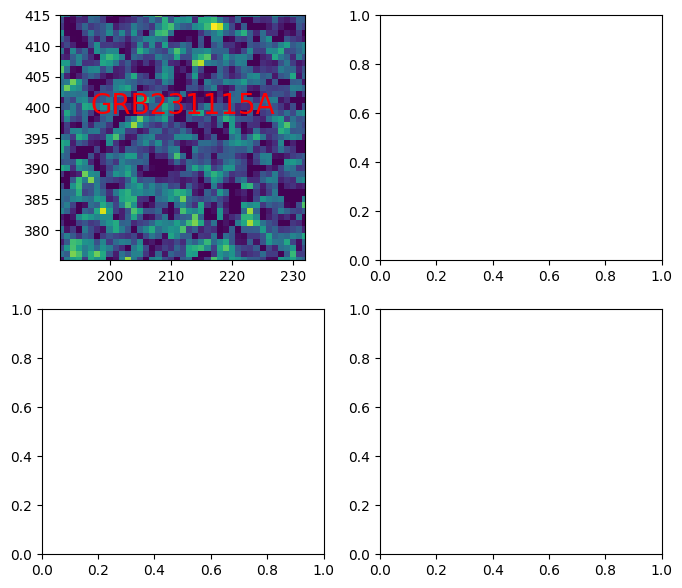

In [99]:
from astropy.wcs import WCS

f, axes = plt.subplots(2, 2, figsize=(8,7))


for burst, ax in zip(bursts, axes.flatten()):
    plt.sca(ax)
    v = list(burst['image_results'].values())[-1]
    # plt.figure(figsize=(5,5))

    s = None
    sv = None

    for e_i, e_v in zip(fits.open(v.skyima)[3::2], fits.open(v.skyima)[2::2]):
        # if 'IMATYPE' not in e.header:
        #     continue
        # if e.header.get('IMATYPE', '??') != 'SIGNIFICANCE':
        #     continue
        # if e.header['E_MAX'] - e.header['E_MIN'] < 10:
        #     continue 
        print(e_i.header['IMATYPE'], e_i.header['E_MIN'], e_i.header['E_MAX'])

        if s is None:
            s = e_i.data / e_v.data
            sv = 1/e_v.data
        else:
            s += e_i.data / e_v.data
            sv += 1/e_v.data
    
    s /= sv
    sv = 1/sv

    # data = s / sv**0.5
    data = s / sv**0.5

    wcs = WCS(e.header)

    c = wcs.wcs_world2pix([[src_coord.ra.deg, src_coord.dec.deg]], 0)

    plt.imshow(data)
    # plt.scatter(*c.T, marker='o', color='red', s=4, facecolors='none', edgecolors='r')
    plt.text(c[0][0], c[0][1]+3, source_name, color='red', ha='center', va='bottom', size=20)
    plt.xlim(c[0][0]-20, c[0][0]+20)
    plt.ylim(c[0][1]-20, c[0][1]+20)
    plt.clim(-1, 3)

    break

    # plt.title(f"{24*3600*(e.header['TFIRST'] - T0_ijd):.2f} s to {(e.header['TLAST'] - T0_ijd)*24*3600:.2f}s")
            #    \nsince T$_0$ = {T0_isot} UTC")

# plt.suptitle(f"ISGRI {e.header['E_MIN']} - {e.header['E_MAX']} keV")

# plt.savefig("isgri_images.png")

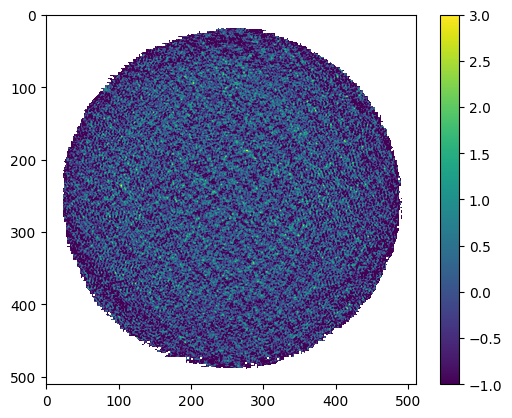

In [79]:
plt.figure()
plt.imshow(data)
# data
plt.colorbar()
plt.clim(-1, 3)


In [ ]:
from oda_api.api import DispatcherAPI
from oda_api.token import discover_token

disp = DispatcherAPI(url="https://www.astro.unige.ch/mmoda//dispatch-data", instrument="mock")

par_dict = {
"DEC": -29.74516667,
"E1_keV": 3.0,
"E2_keV": 20.0,
"RA": 265.97845833,
"T1": "2017-03-06T13:26:48.000",
"T2": "2017-03-06T15:32:27.000",
"T_format": "isot",
"detection_threshold": 7.0,
"instrument": "jemx",
"integral_data_rights": "all-private",
"jemx_num": 1,
"max_pointings": 50,
"osa_version": "OSA11.2",
"product": "jemx_image",
"product_type": "Real",
"radius": 4.0,
"scw_list": ["270900370010.000"],
"src_name": "1E 1740.7-2942",
"token": discover_token(),
}

data_collection = disp.get_product(**par_dict)

In [ ]:
from oda_api.plot_tools import OdaImage
from astropy.table import Table

# plt.figure(figsize=(3,))
img = OdaImage(data_collection)
img.show(sliders=False, sources=Table({'ra': [src_coord.ra.deg], 'dec': [src_coord.dec.deg], 'src_names': [source_name], 'significance': [10]}))

t1 = (data_collection.mosaic_image_0_mosaic.data_unit[4].header['TSTART'] - T0_ijd)*24*3600
t2 = (data_collection.mosaic_image_0_mosaic.data_unit[4].header['TSTOP'] - T0_ijd)*24*3600

plt.title(f"JEM-X 3-20 keV")#, {t1:.2f} - {t2:.2f}")
plt.savefig("jemx.png")
# data_collection.mosaic_image_0_mosaic.data_unit[4]

In [ ]:
t0_ijd_integral = T0_ijd

#def evaluate_sumspec(scw, t1_utc, t2_utc, rebinfactor):
def evaluate_sumspec(t0, t1_rel_s, t2_rel_s, rebinfactor=4, scale="integral"):
    
    # if scale == "geo":    
    #     t0_geo_ijd = float(ic.converttime("ANY", t0, "IJD"))
    #     t0_geo_isot = ic.converttime("ANY", t0, "UTC")

    #     barycorr = ic.get_sc(t0_geo_isot, ra=src_coord.ra.deg, dec=src_coord.dec.deg)['barytime']    
    #     print(barycorr)    

    #     t0_ijd_integral = t0_geo_ijd - barycorr/24./3600.

    
    scw = ic.converttime("ANY", t0_ijd_integral, "SCWID")
    t1_utc = ic.converttime("IJD", t0_ijd_integral + t1_rel_s/24./3600,"UTC")
    t2_utc = ic.converttime("IJD", t0_ijd_integral + t2_rel_s/24./3600,"UTC")
        
    print(scw, t1_utc, t2_utc)
    
    modules = [
           'git://ddosa/staging-1-3',
           'git://findic/staging-1-3-icversion', 
           'git://ddosa11/staging-1-3', 
        #    'git://ddosa11/icversion-noisecontrol', 
           'git://gencat/staging-1-3',
           'git://useresponse/staging-1-3-osa11-pack',
           'git://process_isgri_spectra/staging-1-3-osa11',
           'git://ddosa_delegate',
              ]

    
    r = ddac.query('ISGRISpectraSum', 
                        modules=modules,
                        assume=[
                           #'ddosa.GRcat(use_userefcatvar=True, use_useresources=False)',            
                           'process_isgri_spectra.ScWSpectraList(input_scwlist=ddosa.IDScWList)',
                           'ddosa.IDScWList(use_scwid_list=["{}.000"])'.format(scw),                           
                           'ddosa.ibis_gti(input_usergti=ddosa.gti_user)',
                           'ddosa11.BinEventsSpectra(use_NoisyDetFlag=0)',
                           'ddosa.UserGTI(use_gti=["{}", "{}"], use_version="{}")'.format(t1_utc,t2_utc, hashstring(t1_utc+t2_utc)),
                           'useresponse.CompressEBins(use_factor={})'.format(rebinfactor),
                       ],
                       prompt_delegate=True,
                       inject=[cat],
                       #callback="http://nourl?sessionid=testsession&jobid=testjob"
                    )
    
    return r

for burst in bursts:
    print(burst['ijd'])

    sr = {}
    burst['specres']=sr

    for rb in 4,8:
        try:
            sr[rb] = evaluate_sumspec(burst['ijd'], burst['t1_rel_s'], burst['t2_rel_s'], rb)
        except Exception as e:
            print("exception", e)


In [ ]:
spec = bursts[0]['specres'][8]
spec.isgri_sum_GRB231115A
bursts[0]

In [ ]:
from matplotlib import pylab as plt
from astropy.io import fits
import ogip
import ogip.core

isgri1_pha = ogip.core.open_something(spec.isgri_sum_GRB231115A)
isgri1_arf = ogip.core.open_something(spec.arf_sum_GRB231115A)
isgri1_rmf = ogip.core.open_something(spec.rmf_sum_GRB231115A)

from ogip.spec import PHAI, RMF, rebin, log_bins
from ogip.tools import plot as plot_spec

# model = lambda x:(7e-5*(x/25.)**-2)

def model_generator(p):
    def mdl(x):
        return p[0]*(x/25.)**p[1]*np.exp(-x/500.)

    return mdl

fr = ogip.tools.fit(model_generator, [1e-7, -1.5], 
               [[isgri1_pha, isgri1_rmf, isgri1_arf, (isgri1_rmf._e_min > 50) & (isgri1_rmf._e_min < 300)]],
                method='COBYLA'
                # method='L-BFGS-B'
                                          )

fitted_model = model_generator(fr[0].x)

print(fr[0].x)

en = np.logspace(np.log10(3), 3)

from astropy import units as u

plt.figure(figsize=(7,5))
# plt.plot(en, fitted_model(en)*en**2*u.keV.to(u.erg), lw=3, c='k', alpha=0.5, ls="--")
# erg_in_keV = u.keV.to(u.erg)

plot_spec(isgri1_pha, fitted_model, isgri1_rmf, fig=f, unfolded=False, e_power=0, scale_factor=1,
          plot_model=True,
          plot_kwargs=dict(label="ISGRI"))

from scipy.integrate import quad

def flux_for_pars(p, e1=30, e2=300):
    return quad(lambda x:model_generator(p)(x)*x*u.keV.to(u.erg), e1, e2)[0]

fluence = flux_for_pars(fr[0].x)
plt.title(f"ISGRI 30-300 keV, {bursts[0]['t1_rel_s']:.2f} - {bursts[0]['t2_rel_s']:.2f} s, {fluence:.2e} erg/cm$^2$, slope {fr[0].x[0]:.2f} cutoff 500 keV")
plt.xlabel("Energy (keV)")
plt.ylabel("normalized count rate")

plt.savefig("spec.png")